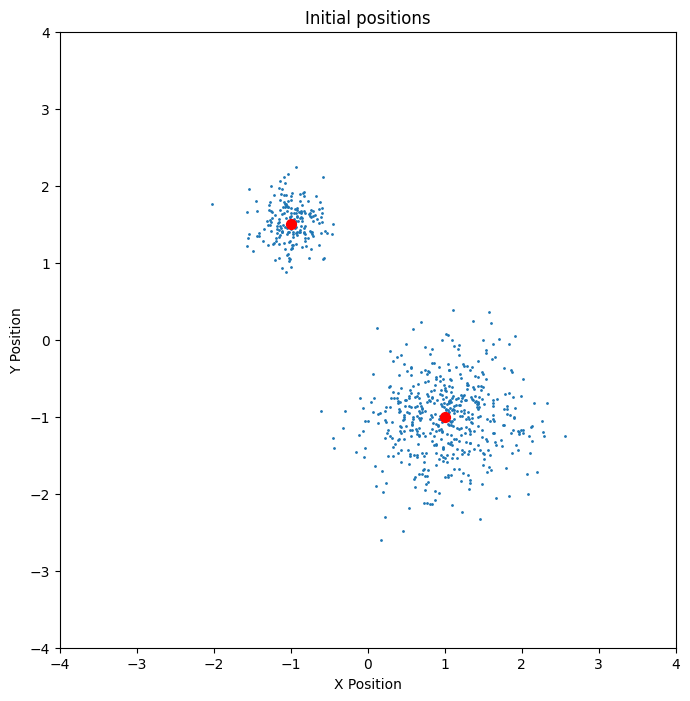

In [299]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)
def generate_data(num_particles1=500, num_particles2=200, noise_level1=0.5, noise_level2=0.25):
    x_1 = np.random.normal(0,noise_level1,size=num_particles1)
    y_1 = np.random.normal(0,noise_level1,size=num_particles1)

    x_2 = np.random.normal(0,noise_level2,num_particles2)
    y_2 = np.random.normal(0,noise_level2,num_particles2)

    particles = np.zeros((num_particles1+num_particles2+2,2))
    particles[0:num_particles1,0] = 1+x_1
    particles[0:num_particles1,1] = -1+y_1

    particles[num_particles1:num_particles1+num_particles2,0] = -1+x_2
    particles[num_particles1:num_particles1+num_particles2,1] = 1.5+y_2

    particles[-2,0] = 1
    particles[-2,1] = -1

    particles[-1,0] = -1
    particles[-1,1] = 1.5
    
    num_particles = particles.shape[0]
    
    masses = np.ones((num_particles, 1))
    masses[-2,0] = 100*num_particles1
    masses[-1,0] = 100*num_particles2


    r_1 = np.zeros((num_particles1,2))
    r_1[:,0] = x_1
    r_1[:,1] = y_1
    v_1 = 0.1*np.sqrt(num_particles1)*(r_1/(np.power(np.sqrt(np.sum(r_1**2,axis=1).reshape(-1,1)),1.5)))@np.array([[0,-1],[1,0]])

    r_2 = np.zeros((num_particles2,2))
    r_2[:,0] = x_2
    r_2[:,1] = y_2
    v_2 = 0.1*np.sqrt(num_particles2)*(r_2/(np.power(np.sqrt(np.sum(r_2**2,axis=1).reshape(-1,1)),1.5)))@np.array([[0,-1],[1,0]])
    v_2[:,0] += 1.5

    velocities = np.zeros((num_particles,2))
    velocities[0:num_particles1] = v_1
    velocities[num_particles1:num_particles1+num_particles2] = v_2
    velocities[-1,0] += 1.5
    
    data = np.hstack((particles, velocities, masses))

    return data

# Generate the fuzzy smiley face dataset
data_final = generate_data()


# Save to file
np.savetxt('initial_conditions.txt', data_final, fmt='%.6f', header='x y vx vy mass')


# Plot the generated fuzzy smiley face for visualization
plt.figure(figsize=(12,8))
plt.scatter(data_final[:-2, 0], data_final[:-2, 1], s=1)
plt.scatter(data_final[-2, 0], data_final[-2, 1], s=50, color='red')
plt.scatter(data_final[-1, 0], data_final[-1, 1], s=50, color='red')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Initial positions')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
